In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file=open('/home/aragorn/Documents/course_work/PH 549/U00096.fna','r')
s=''
i=0
for x in file:
    if i==0:
        pass
    else:
        s=s+x[0:-1]
    i=1
file.close()

In [3]:
print(s[0:6]) ## Verifying that there's no stop codon at the very beginning. 

AGCTTT


In [4]:
stop=['TAG','TAA','TGA']
i=0
i1=0
i2=0
index=[[0],[1],[2]]
while (i<len(s) and i1<len(s) and i2<len(s) and i1!=-1 and i2!=-1 and i!=-1):
    i=i+1 ## The verification in the above cell was done because of this --- I start from index 1 and not index 0.
    i1=i1+1
    i2=i2+1
    i=s.find(stop[0],i)
    if i==-1:
        pass
    else:
#         print(i%3)
#         print(index[i%3])
        index[i%3].append(i)
#     i=i+1
    i1=s.find(stop[1],i1)
    if i1==-1:
        pass
    else:
#         print(i%3)
#         print(index[i%3])
        index[i1%3].append(i1)
#     i1=i1+1
    i2=s.find(stop[2],i2)
    if i2==-1:
        pass
    else:
#         print(i%3)
#         print(index[i%3])
        index[i2%3].append(i2)
#     i2=i2+1


In [5]:
for i in range(3):
    index[i].sort()

In [6]:
L=[[],[],[]]
for i in range(3):
    for x in range(len(index[i])-1):
        L[i].append((index[i][x+1]-index[i][x])//3 - 1)
    L[i][0]=L[i][0]+1 ## The first ORF isn't preceded by a stop codon.


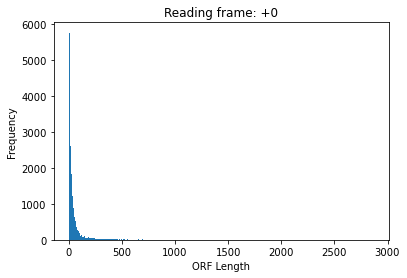

In [7]:
L=np.array(L) ## For an inline plot. (I recommend looking at the created PDFs)
fig,ax=plt.subplots(1)
for i in range(1):
    iqr = stats.iqr(L[i], interpolation = 'midpoint')
    l=np.max(L[i])-np.min(L[i])
    b=int(np.floor((l**(4/3))/2/iqr))
    ax.hist(L[i],bins=b)
    ax.set(xlabel='ORF Length',ylabel='Frequency',title='Reading frame: +'+str(i))

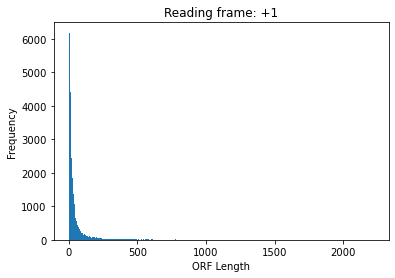

In [8]:
L=np.array(L) ## For an inline plot. (I recommend looking at the created PDFs)
fig,ax=plt.subplots(1)
for i in range(1,2):
    iqr = stats.iqr(L[i], interpolation = 'midpoint')
    l=np.max(L[i])-np.min(L[i])
    b=int(np.floor((l**(4/3))/2/iqr))
    ax.hist(L[i],bins=b)
    ax.set(xlabel='ORF Length',ylabel='Frequency',title='Reading frame: +'+str(i))

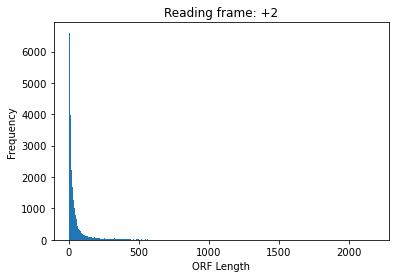

In [9]:
L=np.array(L) ## For an inline plot. (I recommend looking at the created PDFs)
fig,ax=plt.subplots(1)
for i in range(2,3):
    iqr = stats.iqr(L[i], interpolation = 'midpoint')
    l=np.max(L[i])-np.min(L[i])
    b=int(np.floor((l**(4/3))/2/iqr))
    ax.hist(L[i],bins=b)
    ax.set(xlabel='ORF Length',ylabel='Frequency',title='Reading frame: +'+str(i))

In [10]:
# fig, ax = plt.subplots(3)
L=np.array(L)
for i in range(3):
    iqr = stats.iqr(L[i], interpolation = 'midpoint')
    l=np.max(L[i])-np.min(L[i])
    b=int(np.floor((l**(4/3))/2/iqr))
    plt.hist(L[i],bins=b)
    plt.xlabel('ORF Length')
    plt.ylabel('Frequency')
    plt.title('Reading frame: +'+str(i))
    plt.savefig('q5f'+str(i)+'.pdf')
    plt.close()


In [11]:
print(L[0][0:3])

[4, 10, 4]


In [12]:
def entropy1(l): ## Naive-hypothesis
    ## There are 4^{l} subsequences. Each occurs with probabiliter 4^{-l}. Therefore total entropy is -log_{2} 4^{l} = 2l --- Per symbols is -2
    return -2
def entropy2(l): 
    d={}
    i=0
    while i<len(s):
        if s[i:i+l] in d:
            d[s[i:i+l]]=d[s[i:i+l]]+1
        else:
            d[s[i:i+l]]=1
        i=i+l
    P=np.array(list(d.values()))
    P=P/np.sum(P)
    return -1*stats.entropy(P)/l


In [13]:
X=[1,2,3,4,5,6,7,8]
H=[] ## List containing the entropies
for x in X:
    H.append(entropy2(x)-entropy1(x))

Text(0.5, 1.0, 'Difference in entropy per symbol: H(P) + 2')

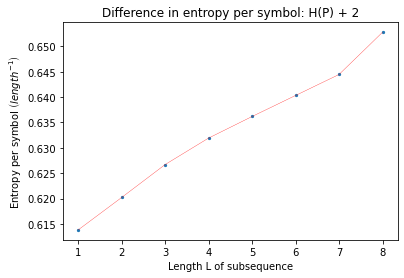

In [14]:
plt.scatter(X,H,s=5)
plt.plot(X,H,lw=0.3,color='red')
plt.xlabel("Length L of subsequence")
plt.ylabel(r"Entropy per symbol $\left(length^{-1}\right)$")
plt.title("Difference in entropy per symbol: H(P) + 2")

In [15]:
plt.scatter(X,H,s=5)
plt.plot(X,H,lw=0.3,color='red')
plt.xlabel("Length L of subsequence")
plt.ylabel(r"Entropy per symbol $\left(length^{-1}\right)$")
plt.title("Difference in entropy per symbol: H(P) + 2")
plt.savefig("./entropy.pdf")
plt.close()

In [16]:
dicts=[{},{},{}]
for i in range(3):
    for j in range(len(L[i])):
        if L[i][j] in dicts[i]:
            dicts[i][L[i][j]]=dicts[i][L[i][j]]+1
        else:
            dicts[i][L[i][j]]=1
    v=sum(list(dicts[i].values()))
    for each in dicts[i]:
        dicts[i][each]=np.log(dicts[i][each]/v)

In [19]:
m=-0.04699327344451327
a=-3.182267256336975
i=0
X=np.array(list(dicts[i].keys()))
plt.scatter(dicts[i].keys(),dicts[i].values(),s=0.1,c='red',label="Reading Frame: +"+str(i))
i=1
plt.scatter(dicts[i].keys(),dicts[i].values(),s=0.1,c='green',label="Reading Frame: +"+str(i))
i=2
plt.scatter(dicts[i].keys(),dicts[i].values(),s=0.1,c='blue',label="Reading Frame: +"+str(i))
plt.scatter(X,m*X + a,s=0.1,c='black',label="Theoretical")
plt.xlabel("ORF Length")
plt.ylabel("log(probability)")
plt.title(r"Determining $L_{cut}$")
plt.legend()
plt.savefig('./lcut.pdf')
plt.close()
